Models for COMP562 Final Project

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, mean_squared_error, auc, roc_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

In [49]:
df = pd.read_csv("./data/diabetes_binary_5050.csv")

In [50]:
df["Diabetes_binary"] = df["Diabetes_binary"].astype(int)
df["HighBP"] = df["HighBP"].astype(int)
df["HighChol"] = df["HighChol"].astype(int)
df["CholCheck"] = df["CholCheck"].astype(int)
df["BMI"] = df["BMI"].astype(int)
df["Smoker"] = df["Smoker"].astype(int)
df["Stroke"] = df["Stroke"].astype(int)
df["HeartDiseaseorAttack"] = df["HeartDiseaseorAttack"].astype(int)
df["PhysActivity"] = df["PhysActivity"].astype(int)
df["Fruits"] = df["Fruits"].astype(int) 
df["Veggies"] = df["Veggies"].astype(int)
df["HvyAlcoholConsump"] = df["HvyAlcoholConsump"].astype(int)
df["AnyHealthcare"] = df["AnyHealthcare"].astype(int)
df["NoDocbcCost"] = df["NoDocbcCost"].astype(int)
df["GenHlth"] = df["GenHlth"].astype(int)
df["MentHlth"] = df["MentHlth"].astype(int)
df["PhysHlth"] = df["PhysHlth"].astype(int)
df["DiffWalk"] = df["DiffWalk"].astype(int)
df["Sex"] = df["Sex"].astype(int)
df["Age"] = df["Age"].astype(int)
df["Education"] = df["Education"].astype(int)
df["Income"] =df["Income"].astype(int)

In [4]:
# drop_columns = ['Sex', 'AnyHealthcare', 'Fruits', 'Veggies']
# df.drop(drop_columns , axis= 1 ,inplace=True)

In [51]:
X_data = df.drop("Diabetes_binary", axis = 1)
Y_data = df["Diabetes_binary"]
label_encoder = LabelEncoder()
Y_data = label_encoder.fit_transform(Y_data)


In [52]:
#80-20 cross validation
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=42)


Logistic Regression Model


In [53]:
lg = LogisticRegression(max_iter = 2000)
lg.fit(X_train, Y_train)
lg_pred = lg.predict(X_test)
lg_pred_prob = lg.predict_proba(X_test)

metrics = ['f1', 'acc', 'prec', 'recall']
f1 = f1_score(Y_test, lg_pred, average = 'weighted')
acc = accuracy_score(Y_test, lg_pred)
prec = precision_score(Y_test, lg_pred, average = 'weighted')
recall = recall_score(Y_test, lg_pred, average = 'weighted')
lg_scores = [f1, acc, prec, recall]
for i in range(0, 4):
    print(metrics[i] + ':' + str(round(lg_scores[i], 5)))


f1:0.74839
acc:0.7485
prec:0.74901
recall:0.7485


In [14]:
matrix = classification_report(Y_test,lg_pred)
print(matrix)

              precision    recall  f1-score   support

           0       0.76      0.73      0.74      7090
           1       0.74      0.77      0.75      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

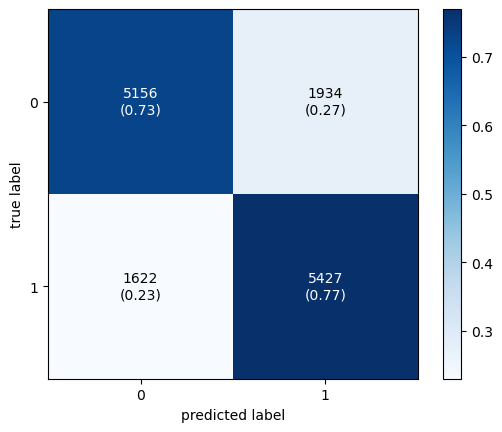

In [22]:
con_mat = confusion_matrix(Y_test,lg_pred)
plot_confusion_matrix(conf_mat=con_mat,show_absolute=True,
                                show_normed=True,
                                colorbar=True)


<Axes: >

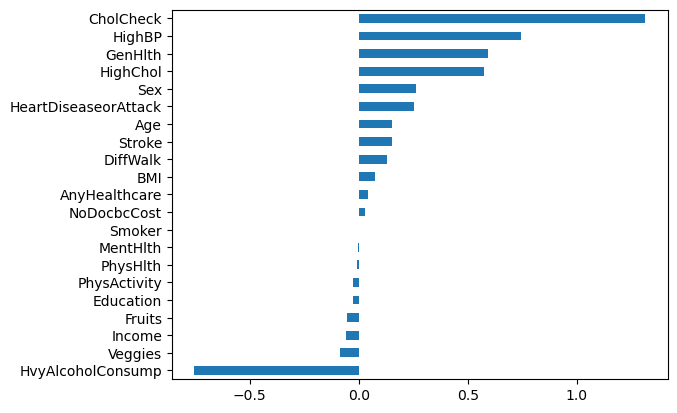

In [13]:
log_imp = pd.Series(lg.coef_[0], index = X_train.columns)
log_imp.sort_values(ascending = True, inplace = True)
log_imp.plot.barh()

Decision tree Classifier Model

In [54]:
dt = DecisionTreeClassifier( max_depth= 12)
dt.fit(X_train , Y_train)
dt_pred=dt.predict(X_test)
dt_pred_prob = dt.predict_proba(X_test)

metrics = ['f1', 'acc', 'prec', 'recall']
f1 = f1_score(Y_test, dt_pred, average = 'weighted')
acc = accuracy_score(Y_test, dt_pred)
prec = precision_score(Y_test, dt_pred, average = 'weighted')
recall = recall_score(Y_test, dt_pred, average = 'weighted')
dt_scores = [f1, acc, prec, recall]
for i in range(0, 4):
    print(metrics[i] + ':' + str(round(dt_scores[i], 5)))


f1:0.72607
acc:0.7265
prec:0.72811
recall:0.7265


(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

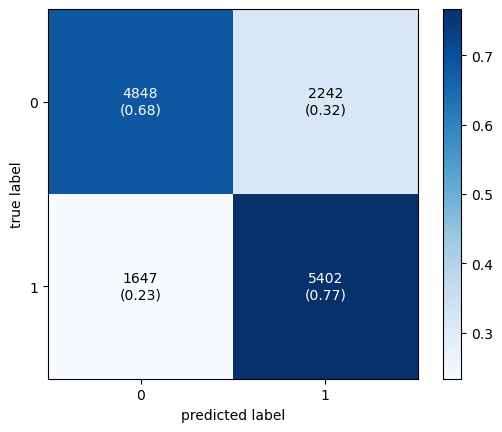

In [25]:
con_mat = confusion_matrix(Y_test,dt_pred)
plot_confusion_matrix(conf_mat=con_mat,show_absolute=True,
                                show_normed=True,
                                colorbar=True)


<Axes: >

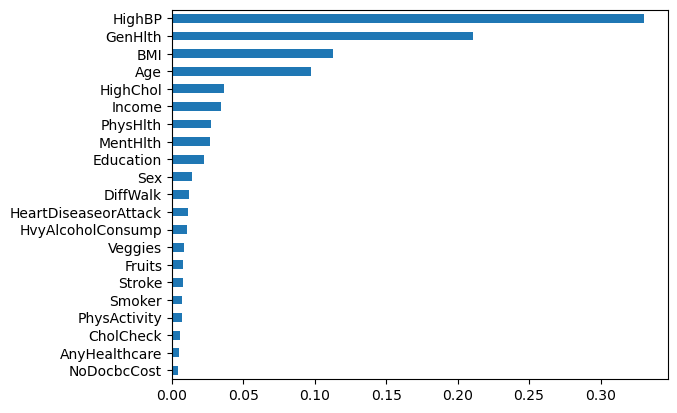

In [27]:
dt_imp = pd.Series(dt.feature_importances_, index = X_train.columns)
dt_imp.sort_values(ascending = True, inplace = True)
dt_imp.plot.barh()

Random Forest Model

In [28]:
rf = RandomForestClassifier(max_depth=12 ,n_estimators =15, random_state=42 )
rf.fit(X_train , Y_train)
rf_pred=rf.predict(X_test)
rf_pred_prob = rf.predict_proba(X_test)

metrics = ['f1', 'acc', 'prec', 'recall']
f1 = f1_score(Y_test, rf_pred, average = 'weighted')
acc = accuracy_score(Y_test, rf_pred)
prec = precision_score(Y_test, rf_pred, average = 'weighted')
recall = recall_score(Y_test, rf_pred, average = 'weighted')
lg_scores = [f1, acc, prec, recall]
for i in range(0, 4):
    print(metrics[i] + ':' + str(round(lg_scores[i], 5)))

f1:0.74397
acc:0.74447
prec:0.74658
recall:0.74447


In [29]:
matrix = classification_report(Y_test,rf_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.77      0.70      0.73      7090
           1       0.72      0.79      0.75      7049

    accuracy                           0.74     14139
   macro avg       0.75      0.74      0.74     14139
weighted avg       0.75      0.74      0.74     14139



(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

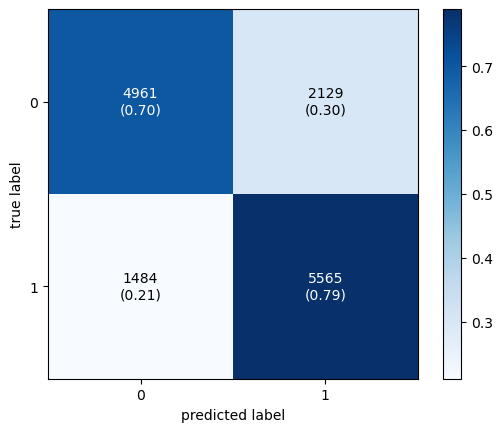

In [31]:
con_mat = confusion_matrix(Y_test,rf_pred)
plot_confusion_matrix(conf_mat=con_mat,show_absolute=True,
                                show_normed=True,
                                colorbar=True)


<Axes: >

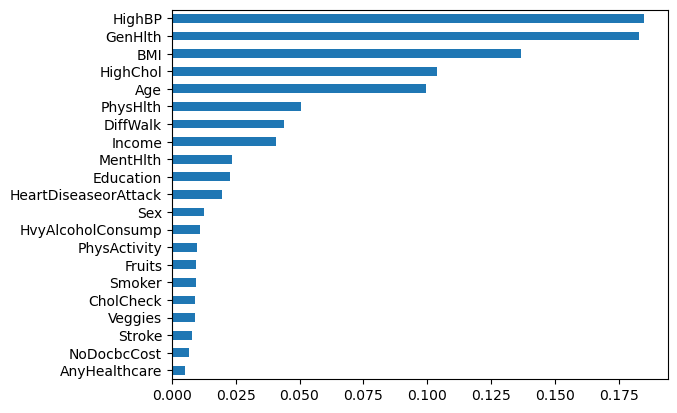

In [30]:
rf_imp = pd.Series(rf.feature_importances_, index = X_train.columns)
rf_imp.sort_values(ascending = True, inplace = True)
rf_imp.plot.barh()

In [15]:
knn = KNeighborsClassifier(n_neighbors= 6)
knn.fit(X_train , Y_train)
knn_pred=knn.predict(X_test)
knn_pred_prob = knn.predict_proba(X_test)

metrics = ['f1', 'acc', 'prec', 'recall']
f1 = f1_score(Y_test, knn_pred, average = 'weighted')
acc = accuracy_score(Y_test, knn_pred)
prec = precision_score(Y_test, knn_pred, average = 'weighted')
recall = recall_score(Y_test, knn_pred, average = 'weighted')
lg_scores = [f1, acc, prec, recall]
for i in range(0, 4):
    print(metrics[i] + ':' + str(round(lg_scores[i], 5)))

f1:0.70064
acc:0.70139
prec:0.70323
recall:0.70139


In [17]:
matrix = classification_report(Y_test,knn_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.68      0.75      0.72      7090
           1       0.72      0.65      0.69      7049

    accuracy                           0.70     14139
   macro avg       0.70      0.70      0.70     14139
weighted avg       0.70      0.70      0.70     14139



(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

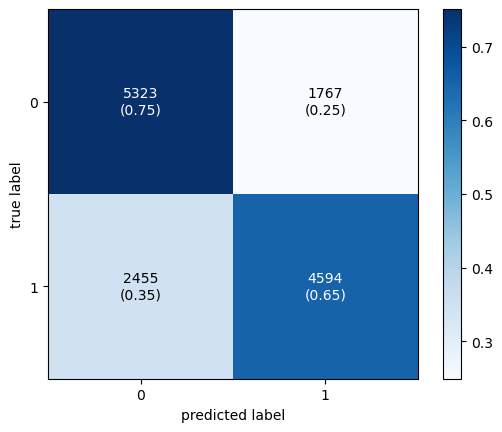

In [33]:
con_mat = confusion_matrix(Y_test,knn_pred)
plot_confusion_matrix(conf_mat=con_mat,show_absolute=True,
                                show_normed=True,
                                colorbar=True)


SVM

In [69]:
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train , Y_train)
svm_pred=svm.predict(X_test)
# svm_pred_prob = svm.predict_proba(X_test, probability=True)

metrics = ['f1', 'acc', 'prec', 'recall']
f1 = f1_score(Y_test, svm_pred, average = 'weighted')
acc = accuracy_score(Y_test, svm_pred)
prec = precision_score(Y_test, svm_pred, average = 'weighted')
recall = recall_score(Y_test, svm_pred, average = 'weighted')
svm_scores = [f1, acc, prec, recall]
for i in range(0, 4):
    print(metrics[i] + ':' + str(round(svm_scores[i], 5)))

f1:0.74796
acc:0.74843
prec:0.75049
recall:0.74843


In [71]:
matrix = classification_report(Y_test,svm_pred )
print(matrix)

              precision    recall  f1-score   support

           0       0.77      0.70      0.74      7090
           1       0.73      0.79      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

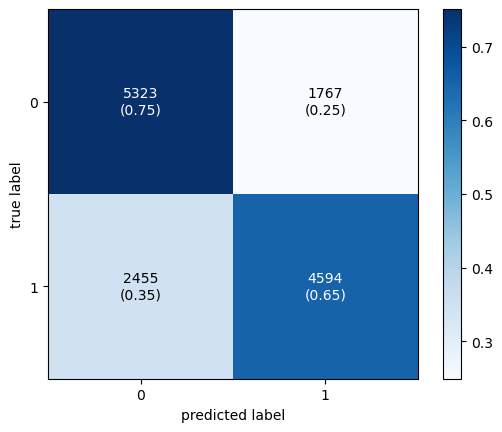

In [72]:
con_mat = confusion_matrix(Y_test,knn_pred)
plot_confusion_matrix(conf_mat=con_mat,show_absolute=True,
                                show_normed=True,
                                colorbar=True)

<Axes: >

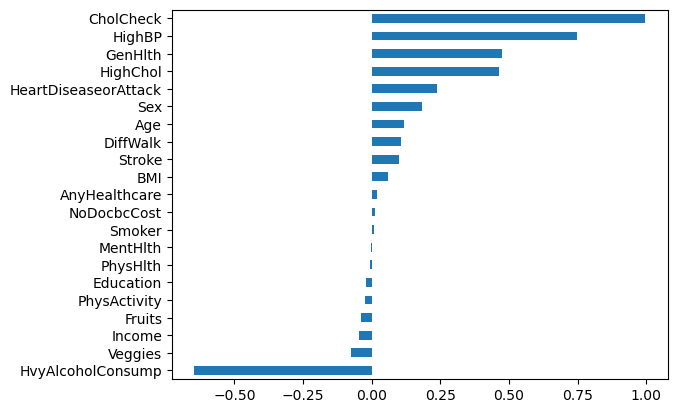

In [70]:
svm_imp = pd.Series(svm.coef_[0],index = X_train.columns)
svm_imp.sort_values(ascending = True, inplace = True)
svm_imp.plot.barh()

XGBoost

In [34]:
xgb = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
xgb.fit(X_train , Y_train)
xgb_pred=xgb.predict(X_test)
xgb_pred_prob = xgb.predict_proba(X_test)

f1 = f1_score(Y_test, xgb_pred, average = 'weighted')
acc = accuracy_score(Y_test, xgb_pred)
prec = precision_score(Y_test, xgb_pred, average = 'weighted')
recall = recall_score(Y_test, xgb_pred, average = 'weighted')
y_scores = [f1, acc, prec, recall]
for i in range(0, 4):
    print(metrics[i] + ':' + str(round(y_scores[i], 5)))

f1:0.75367
acc:0.75416
prec:0.75637
recall:0.75416


In [ ]:
plot_tree(xgb)
plt.show()

In [36]:
matrix = classification_report(Y_test,xgb_pred)
print(matrix)

              precision    recall  f1-score   support

           0       0.78      0.71      0.74      7090
           1       0.73      0.80      0.76      7049

    accuracy                           0.75     14139
   macro avg       0.76      0.75      0.75     14139
weighted avg       0.76      0.75      0.75     14139



(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

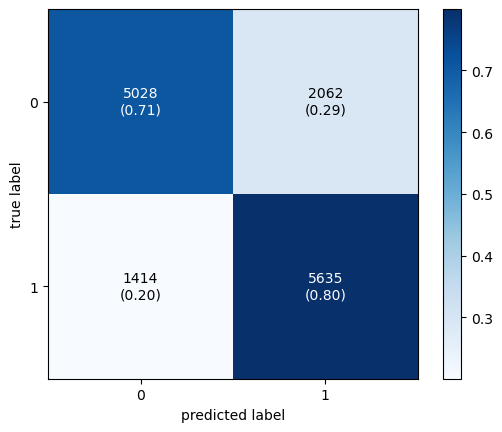

In [37]:
con_mat = confusion_matrix(Y_test,xgb_pred)
plot_confusion_matrix(conf_mat=con_mat,show_absolute=True,
                                show_normed=True,
                                colorbar=True)


<Axes: >

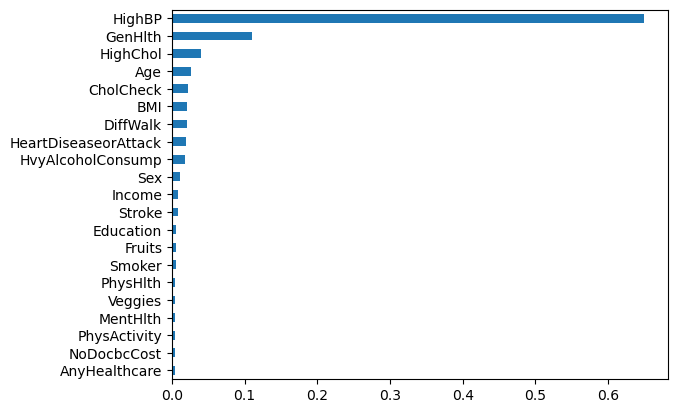

In [35]:
xgb_imp = pd.Series(xgb.feature_importances_, index = X_train.columns)
xgb_imp.sort_values(ascending = True, inplace = True)
xgb_imp.plot.barh()

| Model     | Accuracy |
| ----------- | ----------- |
| Logistic Regression      | 0.7485     |
| Decision Tree   |    0.72594    |
| Random Forest      | 0.74447    |
| KNN  |   0.70139     |
| SVM      | 0.74843     |
| XGBoost   |   0.75416     |